In [1]:
# https://github.com/spmallick/learnopencv/tree/master/Keras-ImageNet-Models
# https://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/

# https://github.com/spmallick/learnopencv/tree/master/Keras-Transfer-Learning
# https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/

# https://github.com/spmallick/learnopencv/tree/master/Keras-Fine-Tuning
# https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [3]:
train_dir = './clean_data/train'
validation_dir = './clean_data/valid'
image_size = 224

In [4]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7f7031b1f278> False
<keras.layers.convolutional.Conv2D object at 0x7f7031b1f7b8> False
<keras.layers.convolutional.Conv2D object at 0x7f7031b1f668> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7031b48828> False
<keras.layers.convolutional.Conv2D object at 0x7f7031b486a0> False
<keras.layers.convolutional.Conv2D object at 0x7f7031b02128> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7031a9e5c0> False
<keras.layers.convolutional.Conv2D object at 0x7f7031a9e438> False
<keras.layers.convolutional.Conv2D object at 0x7f7031abfd68> False
<keras.layers.convolutional.Conv2D object at 0x7f7031ad6fd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7031a8c5c0> False
<keras.layers.convolutional.Conv2D object at 0x7f7031a8c438> False
<keras.layers.convolutional.Conv2D object at 0x7f7031a2ad68> False
<keras.layers.convolutional.Conv2D object at 0x7f7031a42fd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f70319f75c0>

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/20
45/45 [==============================] - 19s 425ms/step - loss: 1.6954 - acc: 0.5178 - val_loss: 0.7277 - val_acc: 0.6667
Epoch 2/20
45/45 [==============================] - 14s 313ms/step - loss: 0.7100 - acc: 0.7178 - val_loss: 0.5487 - val_acc: 0.7500
Epoch 3/20
45/45 [==============================] - 14s 314ms/step - loss: 0.4879 - acc: 0.8078 - val_loss: 0.5091 - val_acc: 0.8111
Epoch 4/20
45/45 [==============================] - 14s 315ms/step - loss: 0.4003 - acc: 0.8400 - val_loss: 0.8213 - val_acc: 0.7056
Epoch 5/20
45/45 [==============================] - 14s 315ms/step - loss: 0.2802 - acc: 0.8967 - val_loss: 0.5035 - val_acc: 0.8000
Epoch 6/20
45/45 [==============================] - 14s 316ms/step - loss: 0.2581 - acc: 0.8978 - val_loss: 1.3532 - val_acc: 0.6722
Epoch 7/20
45/45 [==============================] - 14s 316ms/step - loss: 0.1375 - acc: 0.9500 - val_loss: 0.6495 - val_acc: 0.7778
Epoch 8/20
45/45 [==============================] - 14s 317ms/step - 

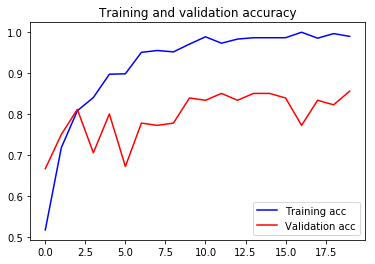

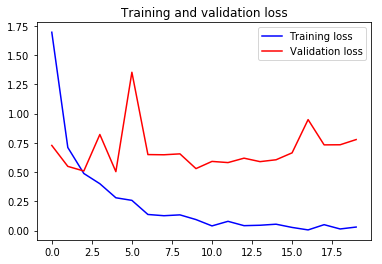

In [8]:
# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Up Next:

#### https://github.com/fchollet/deep-learning-with-python-notebooks